Task #9
=======

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math

sns.set_theme()

#9.1
----
Generate Wiener proccess

In [23]:

def Wiener_proc(N):
    """Generates Wiener process with dt = 1/(2^N)"""
    t = np.linspace(0, 1, 2**(N-1)+1)
    w = np.array([0, np.random.normal(0,1)])
    for k in range(1,N):
        m = (w[:-1] + w[1:])/2
        s = np.sqrt(1/(2**(k+1)))
        new_w = np.zeros(2**k + 1)
        new_w[::2] = w
        new_w[1::2] = np.random.normal(m,s,m.shape)
        w = new_w
    return t,w

Text(0.5, 0, '$t$')

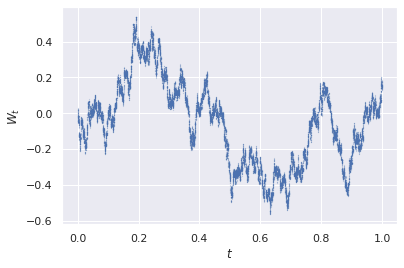

In [64]:
t,w = Wiener_proc(16)
plt.scatter(t,w,s=0.01)
plt.ylabel(r'$W_t$')
plt.xlabel(r'$t$')

#9.2
----
Generate Ornstein-Uhlenbeck process

In [80]:
def OrnUhl_proc(a,s,th,N):
    """Generates Ornstein-Uhlenbeck process in [0,1] with dt = 1/(2^N)"""
    t = np.linspace(0, 1, 2**(N-1)+1)
    ou = np.array([np.random.normal(a,s**2),\
                            np.random.normal(0,s**2 *(1-np.e**(-2*th)))])
    for k in range(1,N):
        dt = 1 / 2**(k-1)
        sum = (ou[:-1] + ou[1:])
        e  = np.ones(2**(k-1)) * np.e**(-th*dt)
        e2  = np.ones(2**(k-1)) * np.e**(-th*dt/2)
        mean = sum * e2/(1+e)
        sigma2 = s**2 * (1-e)/(1+e)
        new_ou = np.zeros(2**k + 1)
        new_ou[::2] = ou
        new_ou[1::2] = np.random.normal(mean,sigma2,e.shape)
        ou = new_ou
    return t,ou


Text(0.5, 0, '$t$')

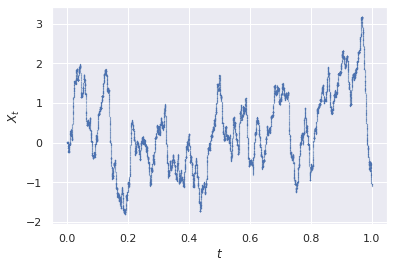

In [105]:
t,ou = OrnUhl_proc(0,1,50,16)
plt.scatter(t,ou,s=0.01)
plt.ylabel(r'$X_t$')
plt.xlabel(r'$t$')